# Importación inicial

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [30]:
df1 = pd.read_csv(r"C:\Users\dpine\red_electrica\red_electrica\data\export_DemandaReal_2025-03-31_12_13.csv", sep = ";")
df2 = pd.read_csv(r"C:\Users\dpine\red_electrica\red_electrica\data\export_DemandaReal_2025-03-31_12_14.csv", sep = ";")
df3 = pd.read_csv(r"C:\Users\dpine\red_electrica\red_electrica\data\export_DemandaReal_2025-03-31_12_16.csv", sep = ";")
df4 = pd.read_csv(r"C:\Users\dpine\red_electrica\red_electrica\data\export_DemandaReal_2025-03-31_12_18.csv", sep = ";")

In [31]:
df = pd.concat([df1,df2,df3,df4], axis = 0)
df

,id,name,geoid,geoname,value,datetime
0,1293,Demanda real,NaN,NaN,24301.666667,2014-01-01T00:00:00+01:00
1,1293,Demanda real,NaN,NaN,23365.333333,2014-01-01T01:00:00+01:00
2,1293,Demanda real,NaN,NaN,21672.500000,2014-01-01T02:00:00+01:00
3,1293,Demanda real,NaN,NaN,20192.000000,2014-01-01T03:00:00+01:00
4,1293,Demanda real,NaN,NaN,19220.666667,2014-01-01T04:00:00+01:00
...,...,...,...,...,...,...
19578,1293,Demanda real,NaN,NaN,31699.333333,2025-03-27T19:00:00+01:00
19579,1293,Demanda real,NaN,NaN,34057.666667,2025-03-27T20:00:00+01:00
19580,1293,Demanda real,NaN,NaN,33419.916667,2025-03-27T21:00:00+01:00
19581,1293,Demanda real,NaN,NaN,30213.250000,2025-03-27T22:00:00+01:00


# Calidad de datos

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98489 entries, 0 to 19582
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        98489 non-null  int64  
 1   name      98489 non-null  object 
 2   geoid     0 non-null      float64
 3   geoname   0 non-null      float64
 4   value     98489 non-null  float64
 5   datetime  98489 non-null  object 
dtypes: float64(3), int64(1), object(2)
memory usage: 5.3+ MB


In [10]:
df.isna().sum()

id              0
name            0
geoid       98489
geoname     98489
value           0
datetime        0
dtype: int64

In [11]:
df.nunique()

id              1
name            1
geoid           0
geoname         0
value       69730
datetime    98489
dtype: int64

In [12]:
df.drop(columns = ["id","name","geoid","geoname"], inplace = True)

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df["datetime"] = pd.to_datetime(df["datetime"], utc = True)

In [15]:
df["value"] = df["value"].astype("float32")

In [16]:
df.rename(columns = {"datetime":"date"}, inplace = True)

In [17]:
df.dtypes

value                float32
date     datetime64[ns, UTC]
dtype: object

# Añadimos variables de interés

In [18]:
df["hora"] = df.date.dt.hour

In [19]:
df["dia_semana"] = df.date.dt.weekday

In [20]:
df["mes"] = df.date.dt.month

In [21]:
df["trimestre"] = df.date.dt.quarter

In [22]:
df["año"] = df.date.dt.year

In [26]:
import holidays

es_holidays = holidays.Spain(years=[2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025], observed = True)

df["festivo"] = df["date"].dt.date.isin(es_holidays.keys()).astype(int)

In [24]:
pib = pd.read_excel(r"C:\Users\dpine\red_electrica\red_electrica\data\PIB_trimestral_excel.xlsx")
pib = pib.iloc[8:52,0:2]
df['año_trimestre'] = df['año'].astype(str) + 'T' + df['trimestre'].astype(str)
df = df.merge(pib, how= "left", left_on = "año_trimestre", right_on = "Series de resultados detallados")
df.drop(columns = ["año_trimestre", "Series de resultados detallados"], inplace = True)
df.rename(columns = {"Unnamed: 1":"pib_trimestral"}, inplace = True)

c:\Users\dpine\red_electrica\red_electrica\venv2\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [25]:
df

,value,date,hora,dia_semana,mes,trimestre,año,festivo,pib_trimestral
0,24301.666016,2013-12-31 23:00:00+00:00,23,1,12,4,2013,0,NaN
1,23365.333984,2014-01-01 00:00:00+00:00,0,2,1,1,2014,1,249575
2,21672.500000,2014-01-01 01:00:00+00:00,1,2,1,1,2014,1,249575
3,20192.000000,2014-01-01 02:00:00+00:00,2,2,1,1,2014,1,249575
4,19220.666016,2014-01-01 03:00:00+00:00,3,2,1,1,2014,1,249575
...,...,...,...,...,...,...,...,...,...
98484,31699.333984,2025-03-27 18:00:00+00:00,18,3,3,1,2025,0,NaN
98485,34057.667969,2025-03-27 19:00:00+00:00,19,3,3,1,2025,0,NaN
98486,33419.917969,2025-03-27 20:00:00+00:00,20,3,3,1,2025,0,NaN
98487,30213.250000,2025-03-27 21:00:00+00:00,21,3,3,1,2025,0,NaN


In [35]:
df

,id,name,geoid,geoname,value,datetime
0,1293,Demanda real,NaN,NaN,24301.666667,2014-01-01T00:00:00+01:00
1,1293,Demanda real,NaN,NaN,23365.333333,2014-01-01T01:00:00+01:00
2,1293,Demanda real,NaN,NaN,21672.500000,2014-01-01T02:00:00+01:00
3,1293,Demanda real,NaN,NaN,20192.000000,2014-01-01T03:00:00+01:00
4,1293,Demanda real,NaN,NaN,19220.666667,2014-01-01T04:00:00+01:00
...,...,...,...,...,...,...
19578,1293,Demanda real,NaN,NaN,31699.333333,2025-03-27T19:00:00+01:00
19579,1293,Demanda real,NaN,NaN,34057.666667,2025-03-27T20:00:00+01:00
19580,1293,Demanda real,NaN,NaN,33419.916667,2025-03-27T21:00:00+01:00
19581,1293,Demanda real,NaN,NaN,30213.250000,2025-03-27T22:00:00+01:00


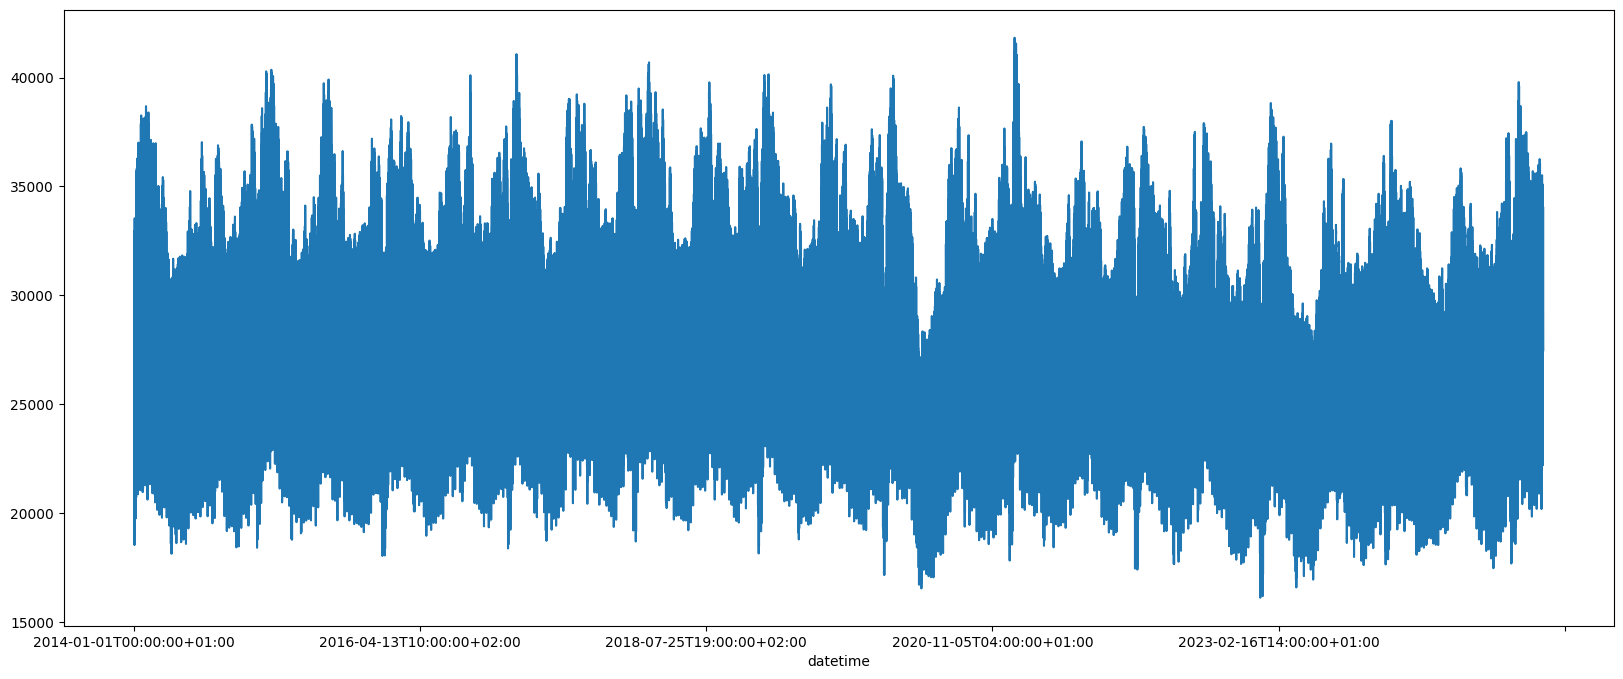

In [38]:
df.set_index("datetime")["value"].plot(figsize = (20,8));

atipicos, describe()